![](policecar.jpg)

# Traffic Violation in Montgomery County, Maryland

**An analysis of traffic violations in Montgomery County, Maryland**

*Authors: Henry Phan & Jason Lim*

*Disclaimer: Please use Mozilla Firefox when viewing this tutorial. There are known issues for any other web browser (including chrome) as they will not able to load some of the maps that we want to display, however Firefox works fine and displays all the maps fine.*
<hr>

## **Introduction**

We will be conducting an analysis on traffic violations in Montgomery County between the years 2012-2018 to show characteristics, relationships, and factors to a traffic violation.

**Background Information**

A traffic violation constitutes as an infringement of motor vehicle laws, which vary from state to state. Minor infractions are moving and non-moving violations, defective or improper vehicle equipment, seat belt, and child-restraint safety violations, exceeding speed limit, insufficient proof of license, insurance, or registration. However for more serious traffic violations, one could be charged as a felon, misdemeanor, or be held criminally liable. Such violations include willful disregard of public safety, death or serious bodily injury, damage to property, etc...

Montgomery County, Maryland is the most populous county in the U.S. state of Maryland. It is also one of the most affluent and prestigious counties in the United States of America, ranking fourth in the healthiest counties in america category as well as ranking 21 in the counties with the best public schools in america category (niche). Also, according to the American Community Survey's new five-year estimates (2013-2017), Montgomery County ranks 17 ($103,178) in terms of wealth. Montgomery County has an approximate  population of 1,052,567. However according to WTOP, the state of Maryland is the third-worst state to drive in due to rush-hour congestion, average commute time and miles driven per person. Also according to WTOP, Maryland drivers have tendencies and reports of speeding, aggressive acceleration, harsh braking, poor turning and phone use.

**Examples of Moving Violation**

* Speeding
* Running a stop sign or red light
* Drunk driving

**Examples of Non-Moving Violation**

* Parking in front of a fire hydrant, in a no-parking zone, or at an expired parking meter.
* Faulty equipment: headlights or tail lights are out, excessive muffler, or having a tint that is lower than 35%. 

**Links/Sources:**


https://wtop.com/business-finance/2018/01/maryland-ranks-among-worst-states-drivers-report/

https://www.niche.com/places-to-live/c/montgomery-county-md/rankings/

Access to the original dataset,
https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations/4mse-ku6q

## Outline

1. Getting Started
    * 1.1 Required Libraries
    * 1.2 Dataset
    * 1.3 Reformatting/Tidying the Dataset
    * 1.4 Auxiliary Functions
2. Exploring the Data
    * 2.1 Map Visualization of Traffic Violation Based on Race and Gender 
    * 2.2 Bar Graph Relating Gender, Race, and the number of Traffic Violation
    * 2.3 HeatMap Exploring the Occurrence based on Hours
    * 2.4 HeatMap Over Time
    * 2.5 Heatmap of All of the Traffic Violation
    * 2.6 Exploring Race and The Violation Type
    * 2.7 Exploring Gender and Violation Type
3. Applications
    * 3.1 Can We Predict What Violation Type Someone Can Get?
    * 3.2 Conclusion

<hr>

## 1. Getting Started

### 1.1 Required Libraries

* Numpy - Used for scientific computing and for the usage of ndarray, a multidimensional array used to store values of same datatype.
* Pandas - Used to display and partition data.
* Matplotlib - pyplot - Used to plot Pandas data into graphs and charts.
* Seaborn - Provides a high-level interface for informative statistical graphics.
* Folium - Used to create interactive Leaflet maps.
    * HeatMap - Used to create a heatmap.
    * HeatMapWithTime - Used to create a heatmap with time (slider).
        * For more information on folium, please visit https://pypi.org/project/folium/0.1.5/
* Datetime - Supplies classes to manipulate dates and times.
* Statsmodels - Used to calculate models and statistics with multple linear regression.


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
import datetime
import statsmodels.formula.api as sm 

### 1.2 Dataset

We use data from kaggle, https://www.kaggle.com/rounak041993/traffic-violations-in-maryland-county, that holds a dataset of traffic violations in Montgomery County, Maryland (2012-2018). The dataset holds information on each traffic violation with categories explaining gender, belts, accident, alcohol, color of vehicle, location, model of car, time of stop, etc... 

The original dataset is in a CSV file, but holds too many entries (1 million will take too long to compile), so we first dropped missing data such as N/A and then took a random 0.5% sample (5,000) of the dataset in a separate notebook and exported it into an excel file.

Loading the first five rows of the .xlsx file to identify the information and categories within the dataset.

*Note: Compiling will take some time as it is processing 5,000 entries.*


In [26]:
original = pd.read_excel('traffic_sample.xlsx')
original.head()

Unnamed: 0 Date Of Stop Time Of Stop Agency  \
0      415031   2016-05-01     23:08:00    MCP   
1      261574   2017-11-30     01:14:00    MCP   
2      523346   2012-05-24     10:48:00    MCP   
3      213661   2012-10-18     03:30:00    MCP   
4      330686   2012-02-16     07:47:00    MCP   

                                         SubAgency  \
0                            4th district, Wheaton   
1                      3rd district, Silver Spring   
2                      3rd district, Silver Spring   
3                      3rd district, Silver Spring   
4  6th district, Gaithersburg / Montgomery Village   

                                         Description  \
0  DRIVER FAIL TO STOP AT RED TRAFFIC SIGNAL BEFO...   
1  DRIVING VEHICLE IN EXCESS OF REASONABLE AND PR...   
2  DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...   
3  DRIVING TO DRIVE MOTOR VEHICLE ON HIGHWAY WITH...   
4  EXCEEDING MAXIMUM SPEED: 34 MPH IN A POSTED 25...   

                             Location   Latitude  Longitude Accident  ...  \
0        GEORGIA AVE AT GLENALLAN AVE  39.063522 -77.055263       No  ...   
1        RANDOLPH ROAD AT TAMARACK RD  39.067270 -76.984982       No  ...   
2      WAYNE AVE / COLESVILLE RD, W/B  38.995165 -77.031199       No  ...   
3        COLUMBIA PIKE AT LORRAIN AVE  38.998501 -77.026377       No  ...   
4  GAME PRESERVE RD N/B (11400 BLOCK)  39.157287 -77.239419       No  ...   

          Charge                 Article Contributed To Accident      Race  \
0     21-202(i1)  Transportation Article                      No  HISPANIC   
1      21-801(a)  Transportation Article                      No     BLACK   
2  21-1124.2(d2)  Transportation Article                      No  HISPANIC   
3      16-101(a)  Transportation Article                      No     BLACK   
4       21-801.1  Transportation Article                      No  HISPANIC   

  Gender    Driver City Driver State DL State        Arrest Type  \
0      M  SILVER SPRING           MD       MD  A - Marked Patrol   
1      M  SILVER SPRING           MD       MD  A - Marked Patrol   
2      F  SILVER SPRING           MD       MD     L - Motorcycle   
3      M     CHESAPEAKE           WV       WV  A - Marked Patrol   
4      F     GERMANTOWN           MD       MD   Q - Marked Laser   

                             Geolocation  
0  (39.0635216666667, -77.0552633333333)  
1          (39.06727, -76.9849816666667)  
2  (38.9951653333333, -77.0311989333333)  
3       (38.9985010833333, -77.02637735)  
4       (39.1572871333333, -77.23941855)  

[5 rows x 36 columns]

### 1.3 Reformatting/Tidying the Dataset

In order to graph the Latitude and Longitude categories on a map, for the future, we reformat the Latitude and Longitude Attributes in the dataset to float variables. To tidy data, we remove "U" in the Gender section as it is unknown/missing data and also remove car model years that are before 1900 and after 2020. The reason for removing data that have years before 1900 and after 2020 because in the dataset, there are car model years that are 12-1199 as well as 2020-9999. These car model years are clearly invalid as cars were not invented until 1885 and the latest car model year this dataset should hold is a 2019 model as the last year observed was 2018.


In [27]:
# Converting the Latitude and Longitude Attributes to a Float
original["Latitude"] = original["Latitude"].astype(float)
original["Longitude"] = original["Longitude"].astype(float)

original = original[original["Gender"] != "U"]
original = original[(original["Year"] != 0) & (original["Year"] < 2020) & (original["Year"] > 1900)]

original.head(n = 10)

Unnamed: 0 Date Of Stop Time Of Stop Agency  \
0      415031   2016-05-01     23:08:00    MCP   
1      261574   2017-11-30     01:14:00    MCP   
2      523346   2012-05-24     10:48:00    MCP   
3      213661   2012-10-18     03:30:00    MCP   
4      330686   2012-02-16     07:47:00    MCP   
5      567779   2015-09-18     14:19:00    MCP   
6      767243   2014-09-05     01:26:00    MCP   
7      391162   2016-11-14     08:08:00    MCP   
8      399408   2016-05-07     21:17:00    MCP   
9      595871   2018-02-06     17:31:00    MCP   

                                         SubAgency  \
0                            4th district, Wheaton   
1                      3rd district, Silver Spring   
2                      3rd district, Silver Spring   
3                      3rd district, Silver Spring   
4  6th district, Gaithersburg / Montgomery Village   
5                         5th district, Germantown   
6                      3rd district, Silver Spring   
7                      3rd district, Silver Spring   
8                      3rd district, Silver Spring   
9                          1st district, Rockville   

                                         Description  \
0  DRIVER FAIL TO STOP AT RED TRAFFIC SIGNAL BEFO...   
1  DRIVING VEHICLE IN EXCESS OF REASONABLE AND PR...   
2  DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...   
3  DRIVING TO DRIVE MOTOR VEHICLE ON HIGHWAY WITH...   
4  EXCEEDING MAXIMUM SPEED: 34 MPH IN A POSTED 25...   
5  DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...   
6  DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...   
7  DRIVING VEHICLE ON HIGHWAY WITHOUT CURRENT REG...   
8  FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...   
9  FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...   

                                   Location   Latitude  Longitude Accident  \
0              GEORGIA AVE AT GLENALLAN AVE  39.063522 -77.055263       No   
1              RANDOLPH ROAD AT TAMARACK RD  39.067270 -76.984982       No   
2            WAYNE AVE / COLESVILLE RD, W/B  38.995165 -77.031199       No   
3              COLUMBIA PIKE AT LORRAIN AVE  38.998501 -77.026377       No   
4        GAME PRESERVE RD N/B (11400 BLOCK)  39.157287 -77.239419       No   
5  OBSERVATION DR AND SENECA MEADOWS PARKWA  39.198632 -77.253483       No   
6               COLUMBIA PIKE @ FAIRLAND RD  39.070163 -76.952160       No   
7               TAMARACK RD / E RANDOLPH RD  39.046277 -76.990695       No   
8         NB NEW HAMPSHIRE AVE @ OAKVIEW DR  39.014340 -77.034123       No   
9                   I-270 PRIOR TO MONTROSE  39.035290 -77.143953       No   

   ...         Charge                 Article Contributed To Accident  \
0  ...     21-202(i1)  Transportation Article                      No   
1  ...      21-801(a)  Transportation Article                      No   
2  ...  21-1124.2(d2)  Transportation Article                      No   
3  ...      16-101(a)  Transportation Article                      No   
4  ...       21-801.1  Transportation Article                      No   
5  ...     21-201(a1)  Transportation Article                      No   
6  ...     21-201(a1)  Transportation Article                      No   
7  ...      13-411(d)  Transportation Article                      No   
8  ...      21-801(b)  Transportation Article                     Yes   
9  ...      16-116(a)  Transportation Article                      No   

       Race Gender    Driver City Driver State DL State        Arrest Type  \
0  HISPANIC      M  SILVER SPRING           MD       MD  A - Marked Patrol   
1     BLACK      M  SILVER SPRING           MD       MD  A - Marked Patrol   
2  HISPANIC      F  SILVER SPRING           MD       MD     L - Motorcycle   
3     BLACK      M     CHESAPEAKE           WV       WV  A - Marked Patrol   
4  HISPANIC      F     GERMANTOWN           MD       MD   Q - Marked Laser   
5     OTHER      M   GAITHERSBURG           MD       MD  A - Marked Patrol   
6     WHITE      M       BETHES

To further tidy the data, we filter out the unnecessary columns/variables such as charge, article, etc... and create a new dataset that holds the filtered version.


In [28]:
filtered_cols = ["Date Of Stop", "Time Of Stop", "SubAgency", 
                 "Description", "Location", "Latitude", "Longitude",
                 "Violation Type", "Race", "Gender"]

# Can break up the criteria above to make the dataframe more tidy
sam = original[filtered_cols].copy()

### 1.4 Auxiliary Functions

The generate_map function creates a folium map whenever called. This function is for efficiency sake as generate_map will be called throughout the project.


In [29]:
# Auto Generate an empty with the location of Montgomery County Maryland
def generate_map(loc = [39.1247, -77.1905], zoom = 10.5, tile = "openstreetmap"):
    res_map = folium.Map(location = loc, zoom_start = zoom, control_scale = True, tiles = tile)
    
    # Add the Tile (or Style) of the Map
    folium.TileLayer('openstreetmap').add_to(res_map)
    folium.TileLayer('Stamen Watercolor').add_to(res_map)
    folium.TileLayer('Stamen Toner').add_to(res_map)
    return res_map
    

The color_select function assigns each race a color, which is used to determine the color for a marker when the map is generating.


In [30]:
# This Function returns the designated color assigned to a race.
def color_select(race):
    ethnicity = {'ASIAN': "#ed8134", # Orange
                 'BLACK': "#391cba", #Indigo
                 'HISPANIC': "#119992", #Teal 
                 'NATIVE AMERICAN': "#9412b8", # Violet 
                 'OTHER': "#127bb8", # Blue
                 'WHITE': "#e81c1c"} # Red
    
    return ethnicity[race]

<hr>

# 2. Exploring the Data

## 2.1 Map Visualization of Traffic Violation Based on Race and Gender 
To illustrate the location, gender, and race of each incident in Montgomery County, we use the Folium library to create a map with the use of markers as a visualization. For clarification, the shape of a marker indicates the race whereas the color of the marker represents the race of the violater. Markers that are triangles represent males where as markers that are squares represent females. As for race reprentation, orange represents asians, indigo represents african americans, teal represents hispanics, violet represents native americans, blue represents other, and red represents white.


In [31]:
# Creating an Empty Map
map_total = generate_map()

# Create Different Layers for each race
asian_fg = folium.FeatureGroup(name = "Asian") 
black_fg = folium.FeatureGroup(name = "Black") 
his_fg = folium.FeatureGroup(name = "Hispanic") 
na_fg = folium.FeatureGroup(name = "Native American") 
other_fg = folium.FeatureGroup(name = "Other") 
white_fg = folium.FeatureGroup(name = "White") 

# Making a hash where the key are the race and the value are 
# the respective layer 
race = {'ASIAN': asian_fg, 
        'BLACK': black_fg, 
        'HISPANIC': his_fg, 
        'NATIVE AMERICAN': na_fg, 
        'OTHER': other_fg, 
        'WHITE': white_fg} 

# Creating a Legend for the Map
legend_html = '''
    <style>
        .circle {
          height: 10px;
          width: 10px;
          background-color: orange;
          border-radius: 50%;
         }
         .square {
              height: 10px;
              width: 10px;
              background-color: #ed8134;
         }
         div {
             display: inline-block;
         }
         legend {
             font-size: 13px
         }
         .triangle {
            width: 0;
            height: 0;
            border-left: 7.5px solid transparent;
            border-right: 7.5px solid transparent;
            border-bottom: 15px solid #ed8134;
         }
    </style>
    
    <div style="position: fixed;
        left: 50px; width: 150px;
        border:2px solid black; z-index:9999; font-size:12px; background-color: white;"> 
        <legend><b>Legend:</b></legend>
        <b>Race: </b><br>
        Asian: <div class = circle style = "background-color: #ed8134"> </div> <br>
        White: <div class = circle style = "background-color: #e81c1c"> </div><br>
        Black: <div class = circle style = "background-color: #391cba"> </div><br>
        Hispanic: <div class = circle style = "background-color: #119992"> </div><br>
        Native American: <div class = circle style = "background-color: #9412b8"> </div><br>
        Other: <div class = circle style = "background-color: #127bb8"> </div>
        <hr>
        <b>Gender: </b><br>
        Male: <div class = triangle> </div> <br>
        Female: <div class = square> </div> <br>

    </div>

     '''
map_total.get_root().html.add_child(folium.Element(legend_html))

for ind, row in sam.iterrows():
    entry = (folium.RegularPolygonMarker(location = [row["Latitude"],row["Longitude"]], popup = row["Description"], 
                                        color= color_select(row["Race"]), fill = True, weight = 1, 
                                        number_of_sides = 3 if row["Gender"] == "M" else 4, 
                                        radius = 4, opactity = .4))
    entry.add_to(race[row["Race"]])

for r in race:
    race[r].add_to(map_total)
    
folium.LayerControl().add_to(map_total)

map_total

*To view this map, please use Mozilla Firefox*

Observation: Many of the traffic violations are along big roads such as interstates, highways, and major roads (viers mill, georgia avenue, etc...). An explanation of this observation could be that these big roads connect through each major cities, which one could infer that people take these big roads for commuting to work or traveling to a different city. Thus major roads have a higher motor vehicle population than residential areas, causing more traffic violations due to sheer number advantage and higher police density.

## 2.2 Bar Graph Relating Gender, Race, and the Number of Traffic Violation

A bar graph illustrates and depicts the differences between values and categories. In this case, we chose a bar graph to compare the gender, race, and number of each traffic violation. Using the matplotlib and seaborn libraries, we create a bar graph that depicts the occurences of traffic violation based on gender and race. The Y-axis is the number of traffic violations whereas the X-axis is the gender and for each gender there will be the six races (asian, white, african american, hispanic, native american, other).


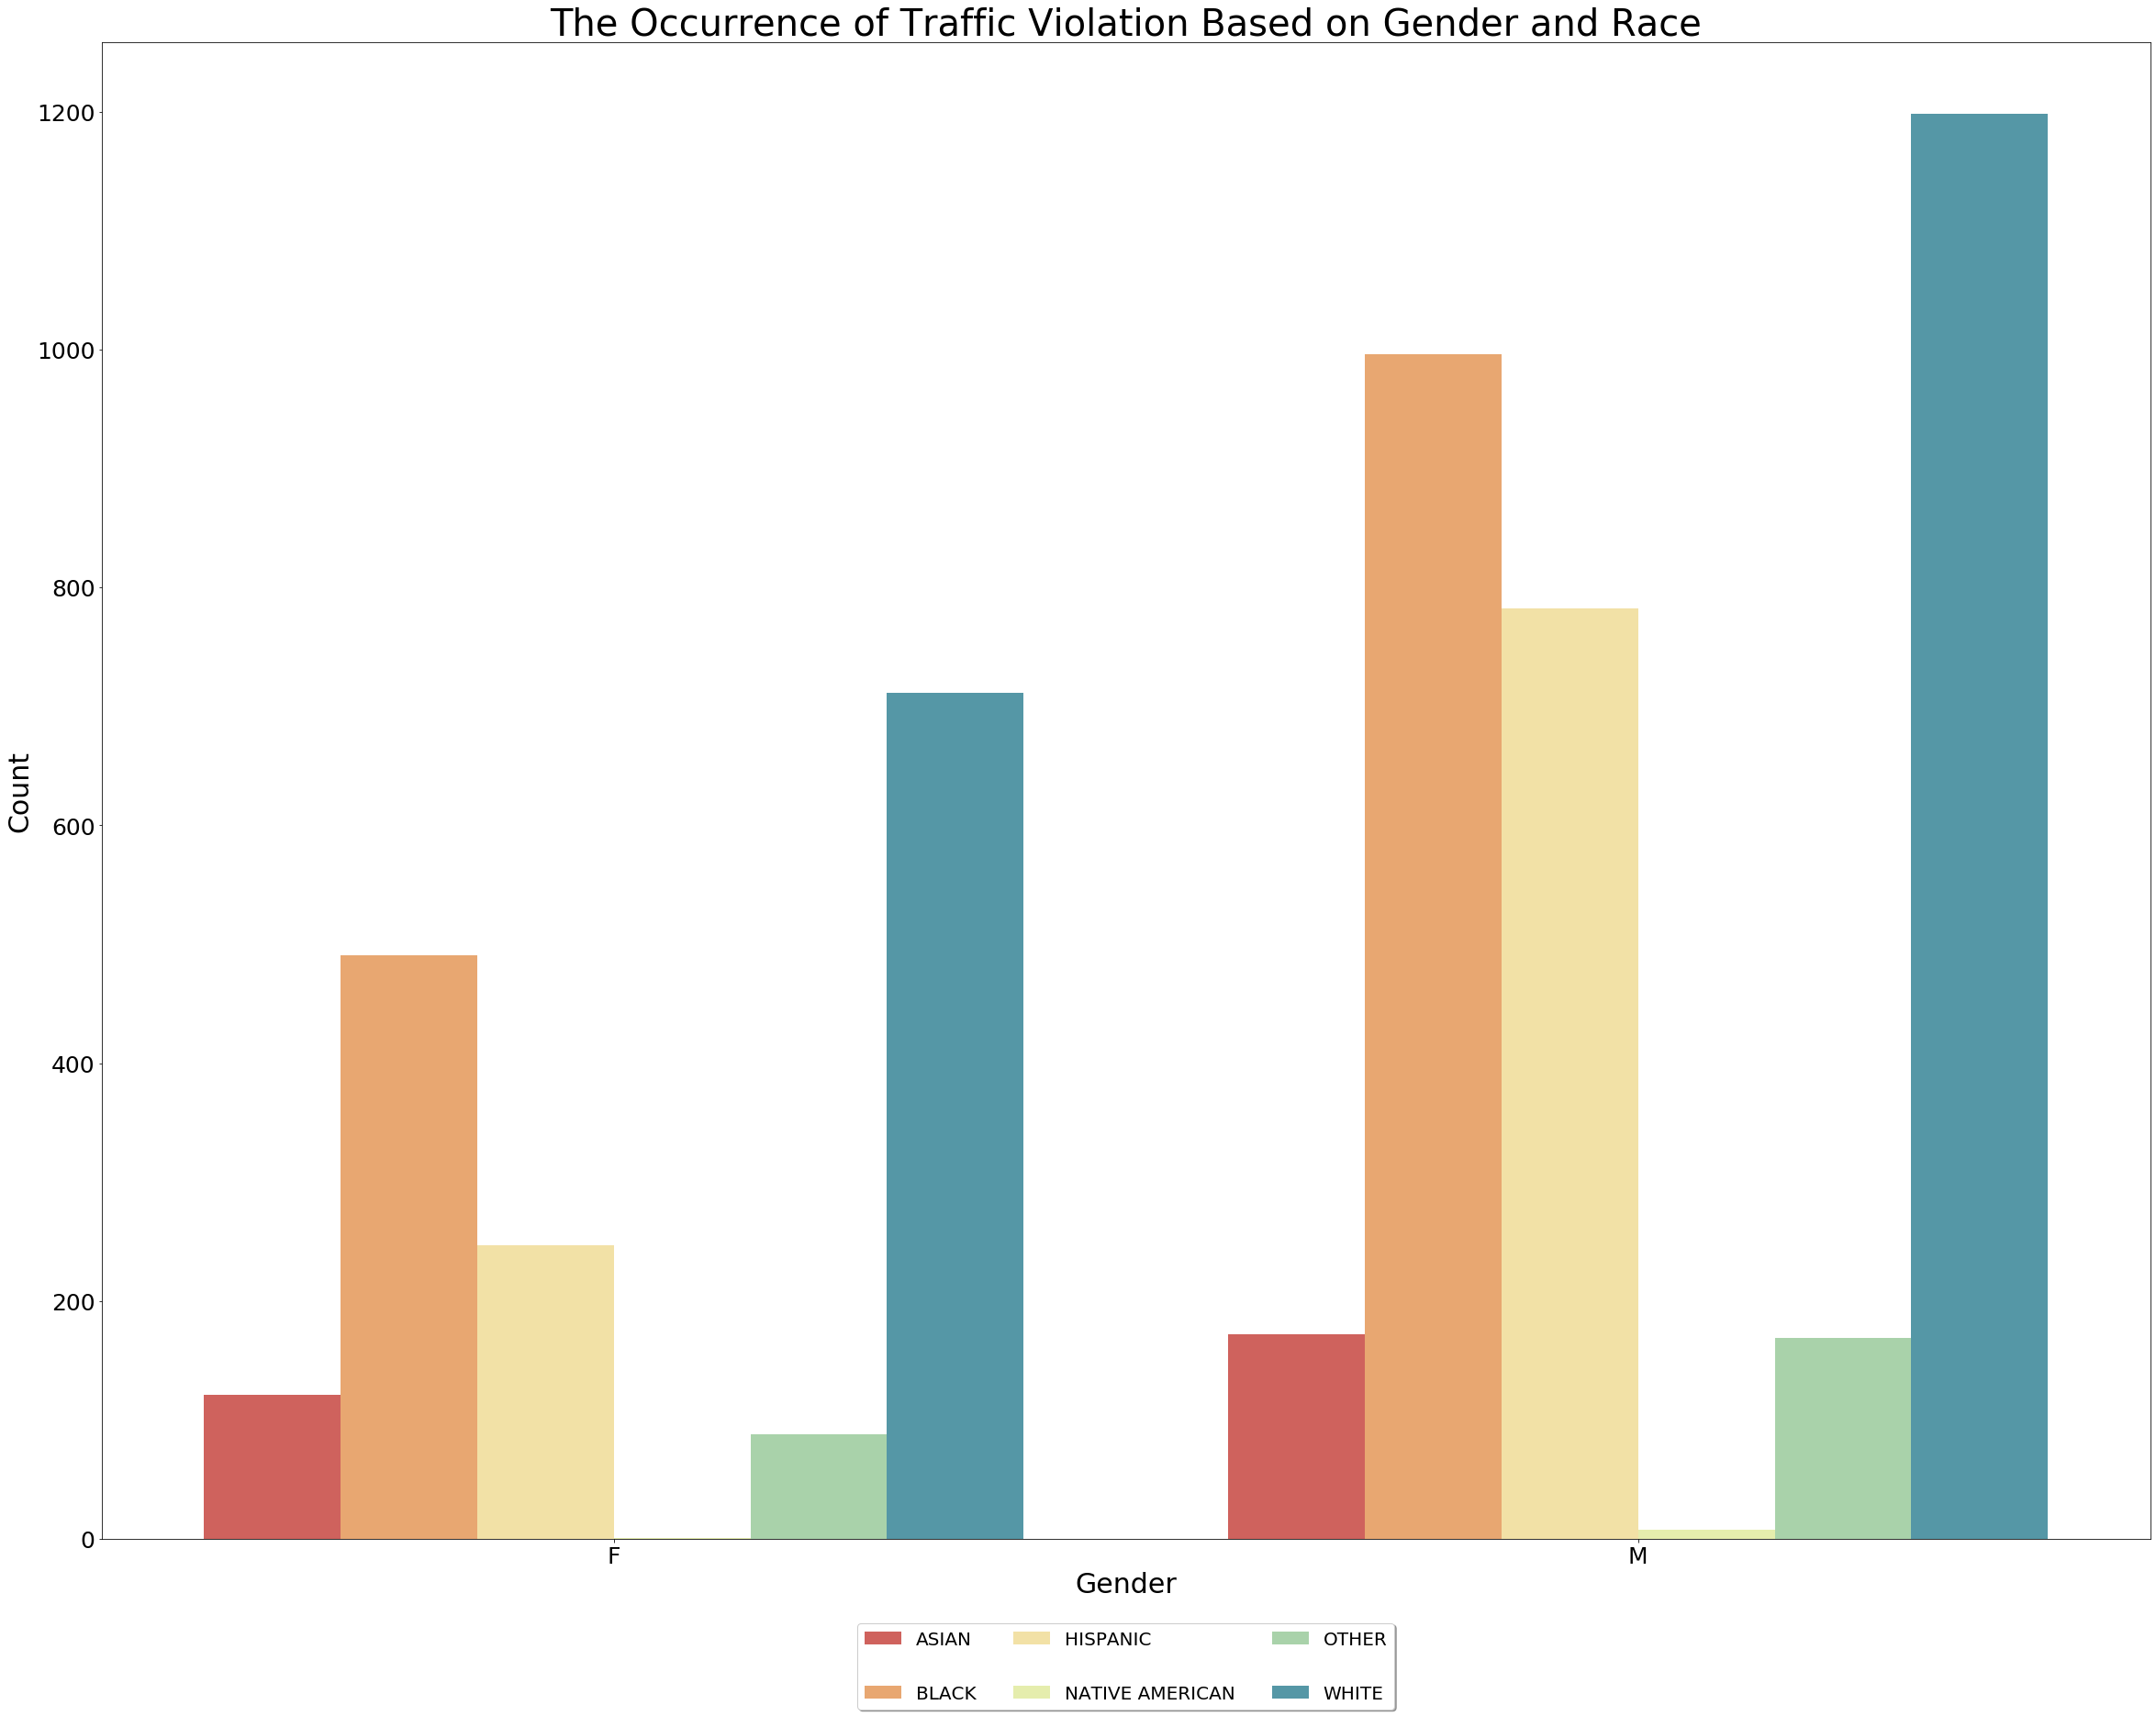

In [32]:
gr_df = sam.copy()
gr_df["count"] = 1

aggregation_functions = {'count': 'sum'}
nd = gr_df.groupby(['Gender', 'Race']).aggregate(aggregation_functions)

# Setting up the plot and dimension
fig, axs = plt.subplots() 
fig.set_figheight(30)
fig.set_figwidth(40)

b1 = sns.barplot(x="Gender", y ="count", hue="Race", palette = "Spectral", data=nd.reset_index(), ax = axs)
b1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3, labelspacing=2, fontsize = 20)

b1.set_title("The Occurrence of Traffic Violation Based on Gender and Race", fontsize = 40)
b1.set_ylabel("Count", fontsize = 30)
b1.set_xlabel("Gender", fontsize = 30)
b1.tick_params(axis='both', labelsize=25)

plt.show()

Observation: The bar graph above shows that there are higher numbers of traffic violations for males compared to females. Also, white individuals seem to violate traffic laws the most, with african americans ranking second, and hispanics ranking third. This phenomena may be due to a higher ratio of white, african american, and hispanics individuals living in Montgomery County compared to native americans, asians, and others.


## 2.3 HeatMap Exploring the Occurrence based on Hours

A heat map is a great visual representation to illustrate occurrence of a variable over another variable on a geographical map. In this case, we would like to observe the number of traffic violations over time (hours). With a heat map, created with Folium, we are not only able to depict the number of traffic violations on a geographical map but also able to specify the specific hours the violation occurs.


In [33]:
sam["hour"] = [t.hour for t in sam["Time Of Stop"]]
cut = pd.cut(sam["hour"], bins = [0,2,4,6,8,10,12,14,16,18,20,22,24], 
             labels = [1,2,3,4,5,6,7,8,9,10,11,12], right = False)
sam["cut"] = cut

In [34]:
df_copy = sam.copy()
df_copy['count'] = 1
hr_map = generate_map()

hm_fg = []
hr = 0
for ind in range(12):
    temp_name = "Hours " + str(hr) + " to " + str(hr + 1)
    hm_fg.append(folium.FeatureGroup(name = temp_name, show= True if ind == 0 else False))
    hr += 2


# Group time together to have more during a specifc set of hours\
for index in range(12):    
    temp = df_copy[df_copy["cut"] == index + 1]
    HeatMap(data=temp[['Latitude', 'Longitude', 'count']]
                .groupby(['Latitude', 'Longitude', 'count'])
                .sum()
                .reset_index()
                .values.tolist(), 
                radius=8, max_zoom=13).add_to(hm_fg[index])
    
for fg in hm_fg:
    fg.add_to(hr_map)
        
    
folium.LayerControl().add_to(hr_map)

hr_map

`You can filter what time the heat map is showing using the layer tool at the top right corner of the map.`

Indicator: *Blue on the map indicates not many occurences of violations, where as green - yellow - red represents more occurences in rising order.*

Observation: During late night times (midnight - 2am), most occurences of violations occur in higher populated areas (cities) such as Silver Spring, Bethesda, and Glenmont. Throughout the rest of the day, Silver Spring, Bethesda, and Aspen Hill still record high occurences of traffic violations as well as Gaithersburg and Germantown. There are smaller occurences of traffic violations throughout the areas in Montgomery County that are not near big cities. An explanation that could explain this phenomena is that cities have higher population density than the areas around the city, causing more police to be on patrol within the cities. This point will be further analyzed in section 2.5.


## 2.4 HeatMap Over Time

Another means of representing the occurences of traffic violations on a geographical map with respect to time is through a heat map with a slider (similar to the weather maps). This map is identical to the map above (with same indicators), but is easier for one to see the change of number and locations of traffic violations throughout the day as there is an animation and one could choose the time they want to observe by using the slider.


In [35]:
time_map = generate_map()
df_hour_list = []
for hour in df_copy["cut"].sort_values().unique():
    df_hour_list.append(df_copy.loc[df_copy.hour == hour, ['Latitude', 'Longitude', 'count']]
                        .groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist())

HeatMapWithTime(df_hour_list, radius=8, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, 
                min_opacity=0.5, max_opacity=0.8, use_local_extrema=True, auto_play=True).add_to(time_map)

folium.LayerControl().add_to(time_map)

time_map

## 2.5 Heatmap of All of the Traffic Violation

To further observe and visualize the occurences of traffic violations through Montgomery County, we create a heat map of ALL the traffic violations within the dataset. In other words, this map is not in regards to time but rather a mass aggregate of traffic violations throughout 2012-2018. This will enable us to view which parts of Montgomery County has a reputation of traffic violations, which could infer unsafe roads, reckless drivers, or high numbers of police in such areas.


In [36]:
df_copy = sam.copy()
df_copy['count'] = 1
base_map = generate_map()

HeatMap(data=df_copy[['Latitude', 'Longitude', 'count']]
            .groupby(['Latitude', 'Longitude', 'count'])
            .sum()
            .reset_index()
            .values.tolist(), 
            radius=8, max_zoom=13).add_to(base_map)

folium.LayerControl().add_to(base_map)

base_map

Indicator: *Blue on the map indicates not many occurences of violations, where as green - yellow - orange - red represents more occurences in rising order.*

Observation: Most major cities in Montgomery County observes high number of traffic violations. To dive in further, the inner city of Bethesda, Silver, Spring, Rockville, and Gaithersburg are depicted in with a yellow-orange-red color, where as the areas around the cities are green and blue. This further supports the explanation of this phenomena stated in section 2.3.


## 2.6 Exploring Race and The Violation Type

For each traffic violation, a police has the discretion to either give a citation or a warning to the offender. There are myths that claim that white individuals have more leniency from the cops and thus are more likely to get warnings. To observe and test this myth, we create another bar graph to visualize the number of occurence of traffic violation and violation type based on race. The y-axis being the number of traffic violations and the x-axis being the race. Each race "bar" has two sides where one depicts the warning amounts and the other is the citation amount.

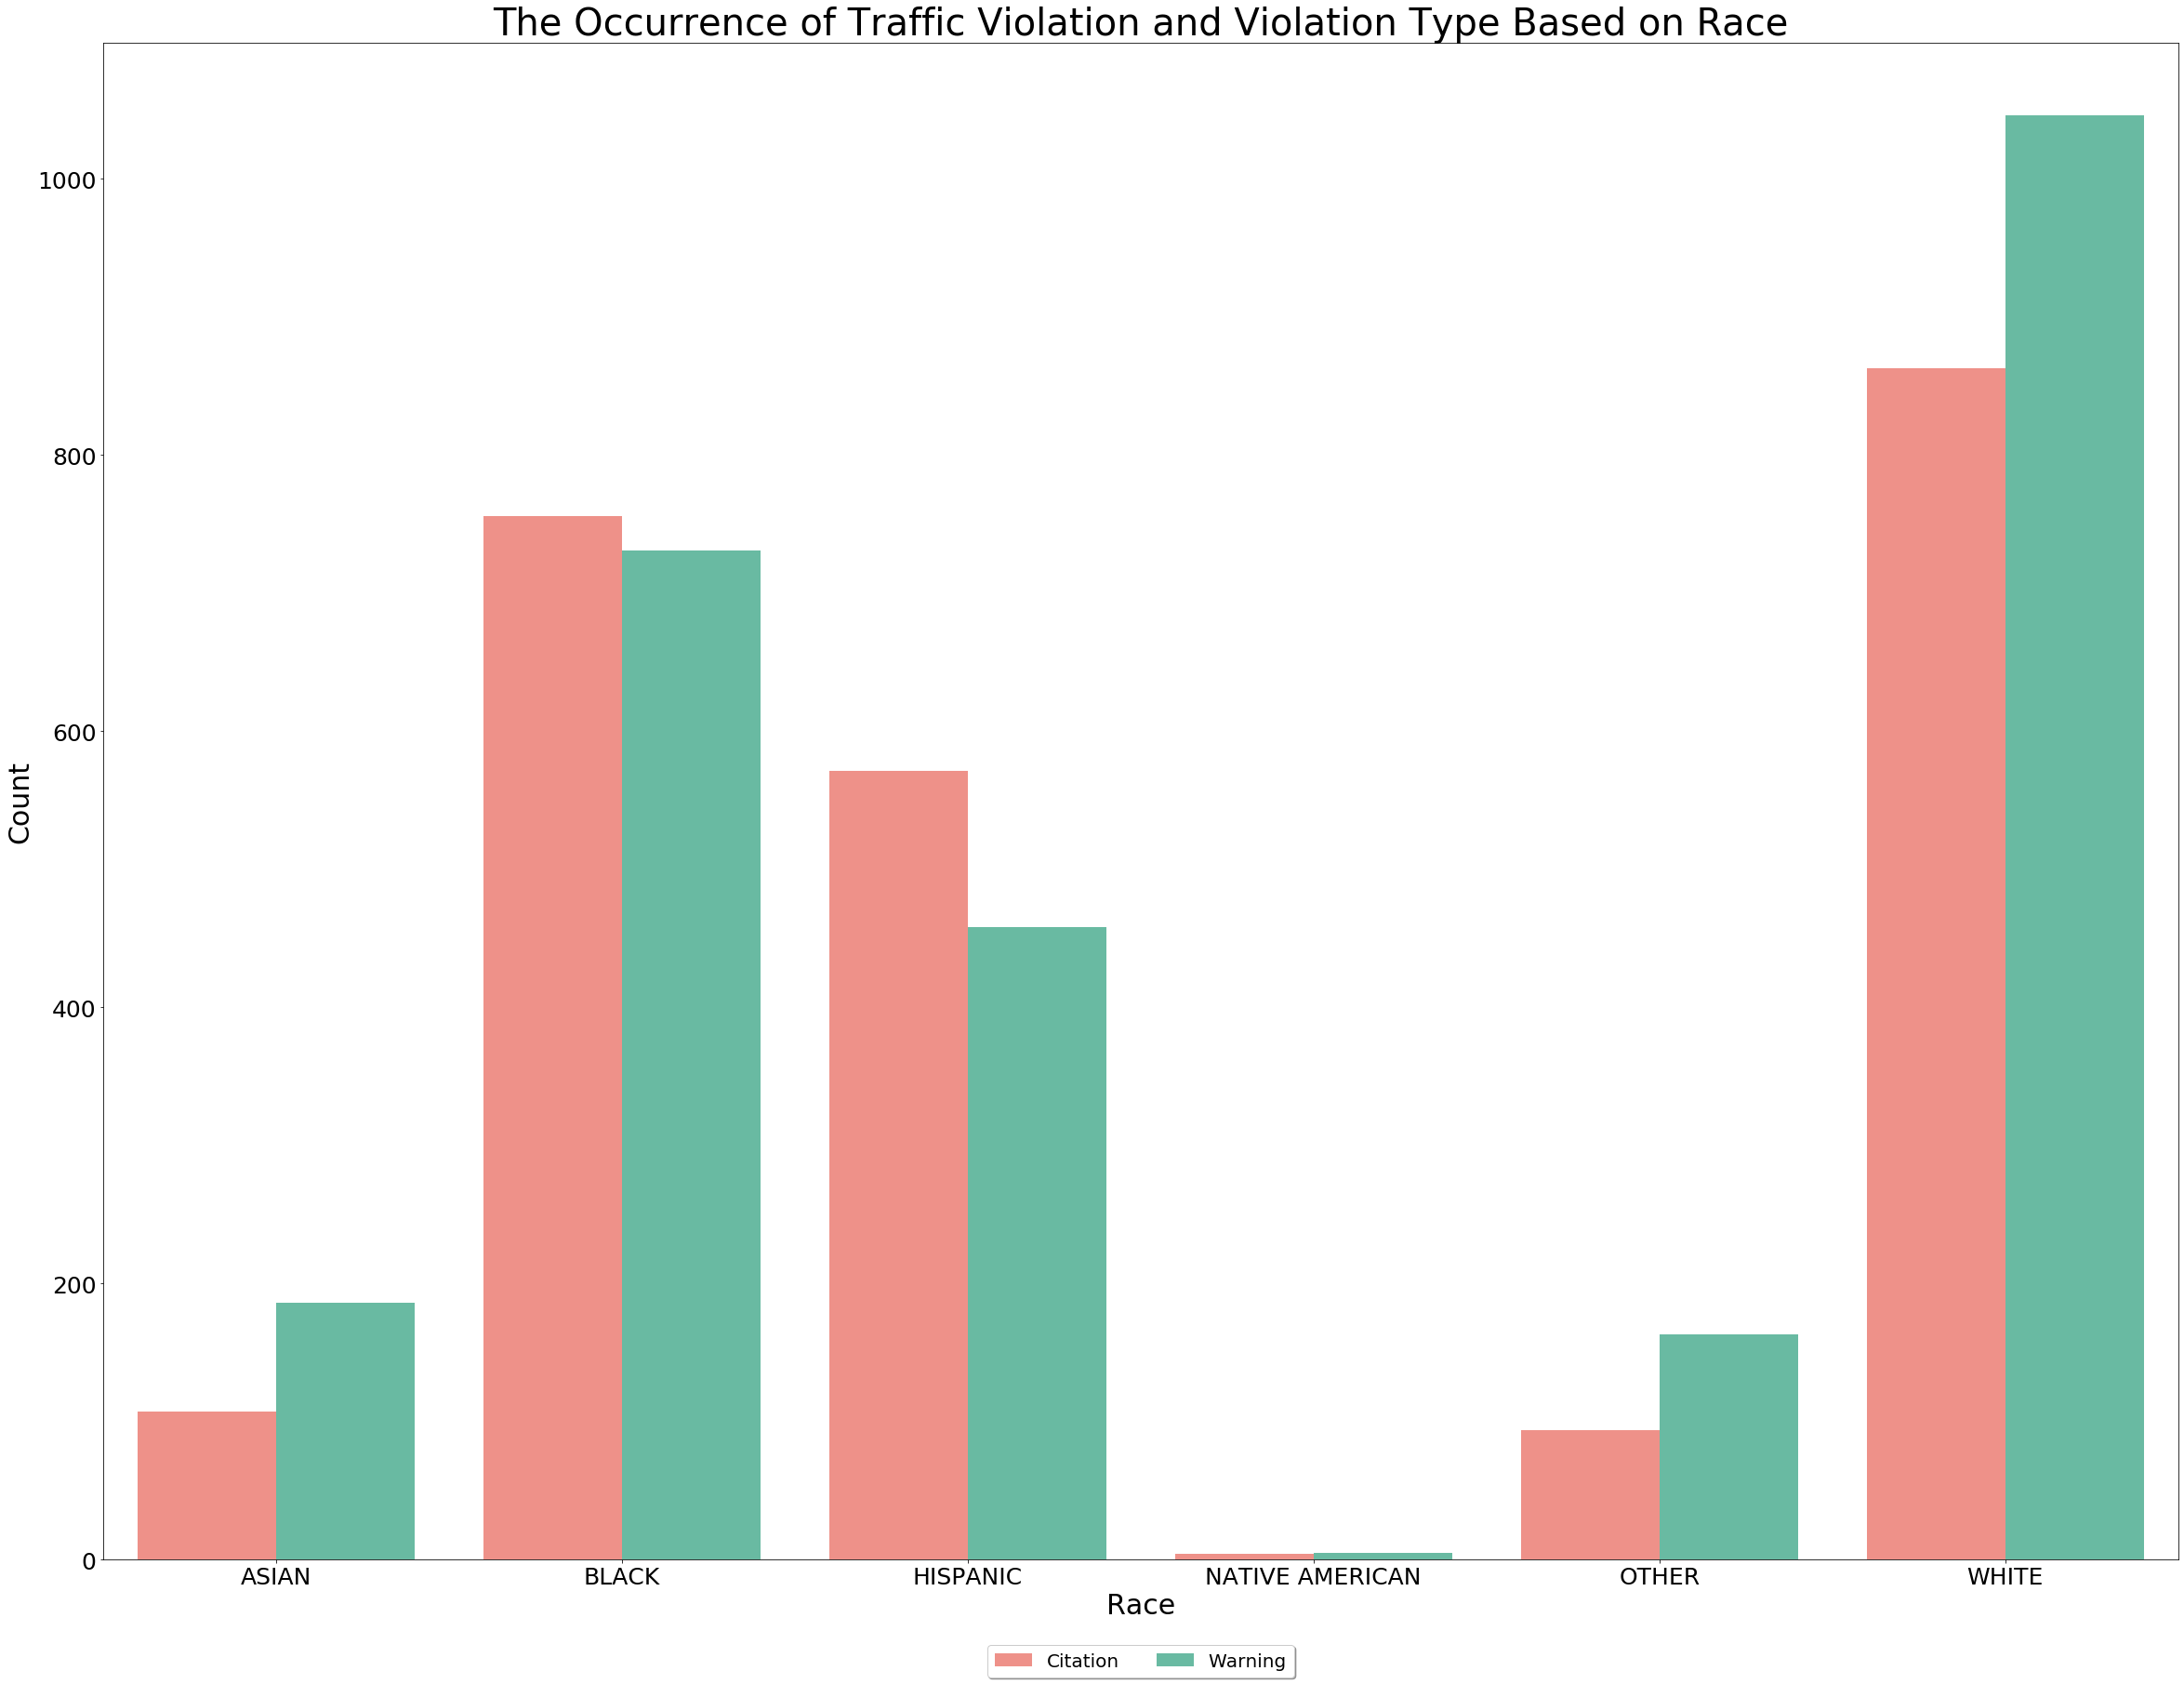

In [37]:
rv = sam.copy()
rv["count"] = 1

aggregation_functions = {'count': 'sum'}
nd = rv.groupby(['Race', 'Violation Type']).aggregate(aggregation_functions)

# Setting up the plot and dimension
fig, axs = plt.subplots() 
fig.set_figheight(30)
fig.set_figwidth(40)

r1 = sns.barplot(x="Race", y ="count", hue="Violation Type", palette = ["#ff8378", "#5bc7a7"], data=nd.reset_index(), ax = axs)
r1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3, labelspacing=2, fontsize = 20)

r1.set_title("The Occurrence of Traffic Violation and Violation Type Based on Race", fontsize = 40)
r1.set_ylabel("Count", fontsize = 30)
r1.set_xlabel("Race", fontsize = 30)
r1.tick_params(axis='both', labelsize=25)

plt.show()

Observation: Of the six races illustrated on the bar graph, four races have higher ratios of warnings than citations. The four races are asian, native american, other, and white. This is just a quantitive figure and with nothing else backing up, such as the severity of each traffic violation. Thus one should not base their claim off of this graph, but one could further argue that white individuals do indeed have more leniency. However, one could instead argue that police could have a racial bias against black and hispanic individuals because they are the minority in this graph (having higher citation ratio than warning).

## 2.7 Exploring Gender and Violation Type

After exploring the trend between race and violation type, we should analyze the relationship between gender and violation type. In this graph, we shall determine if gender could potentially play into receiving a warning or a citation.

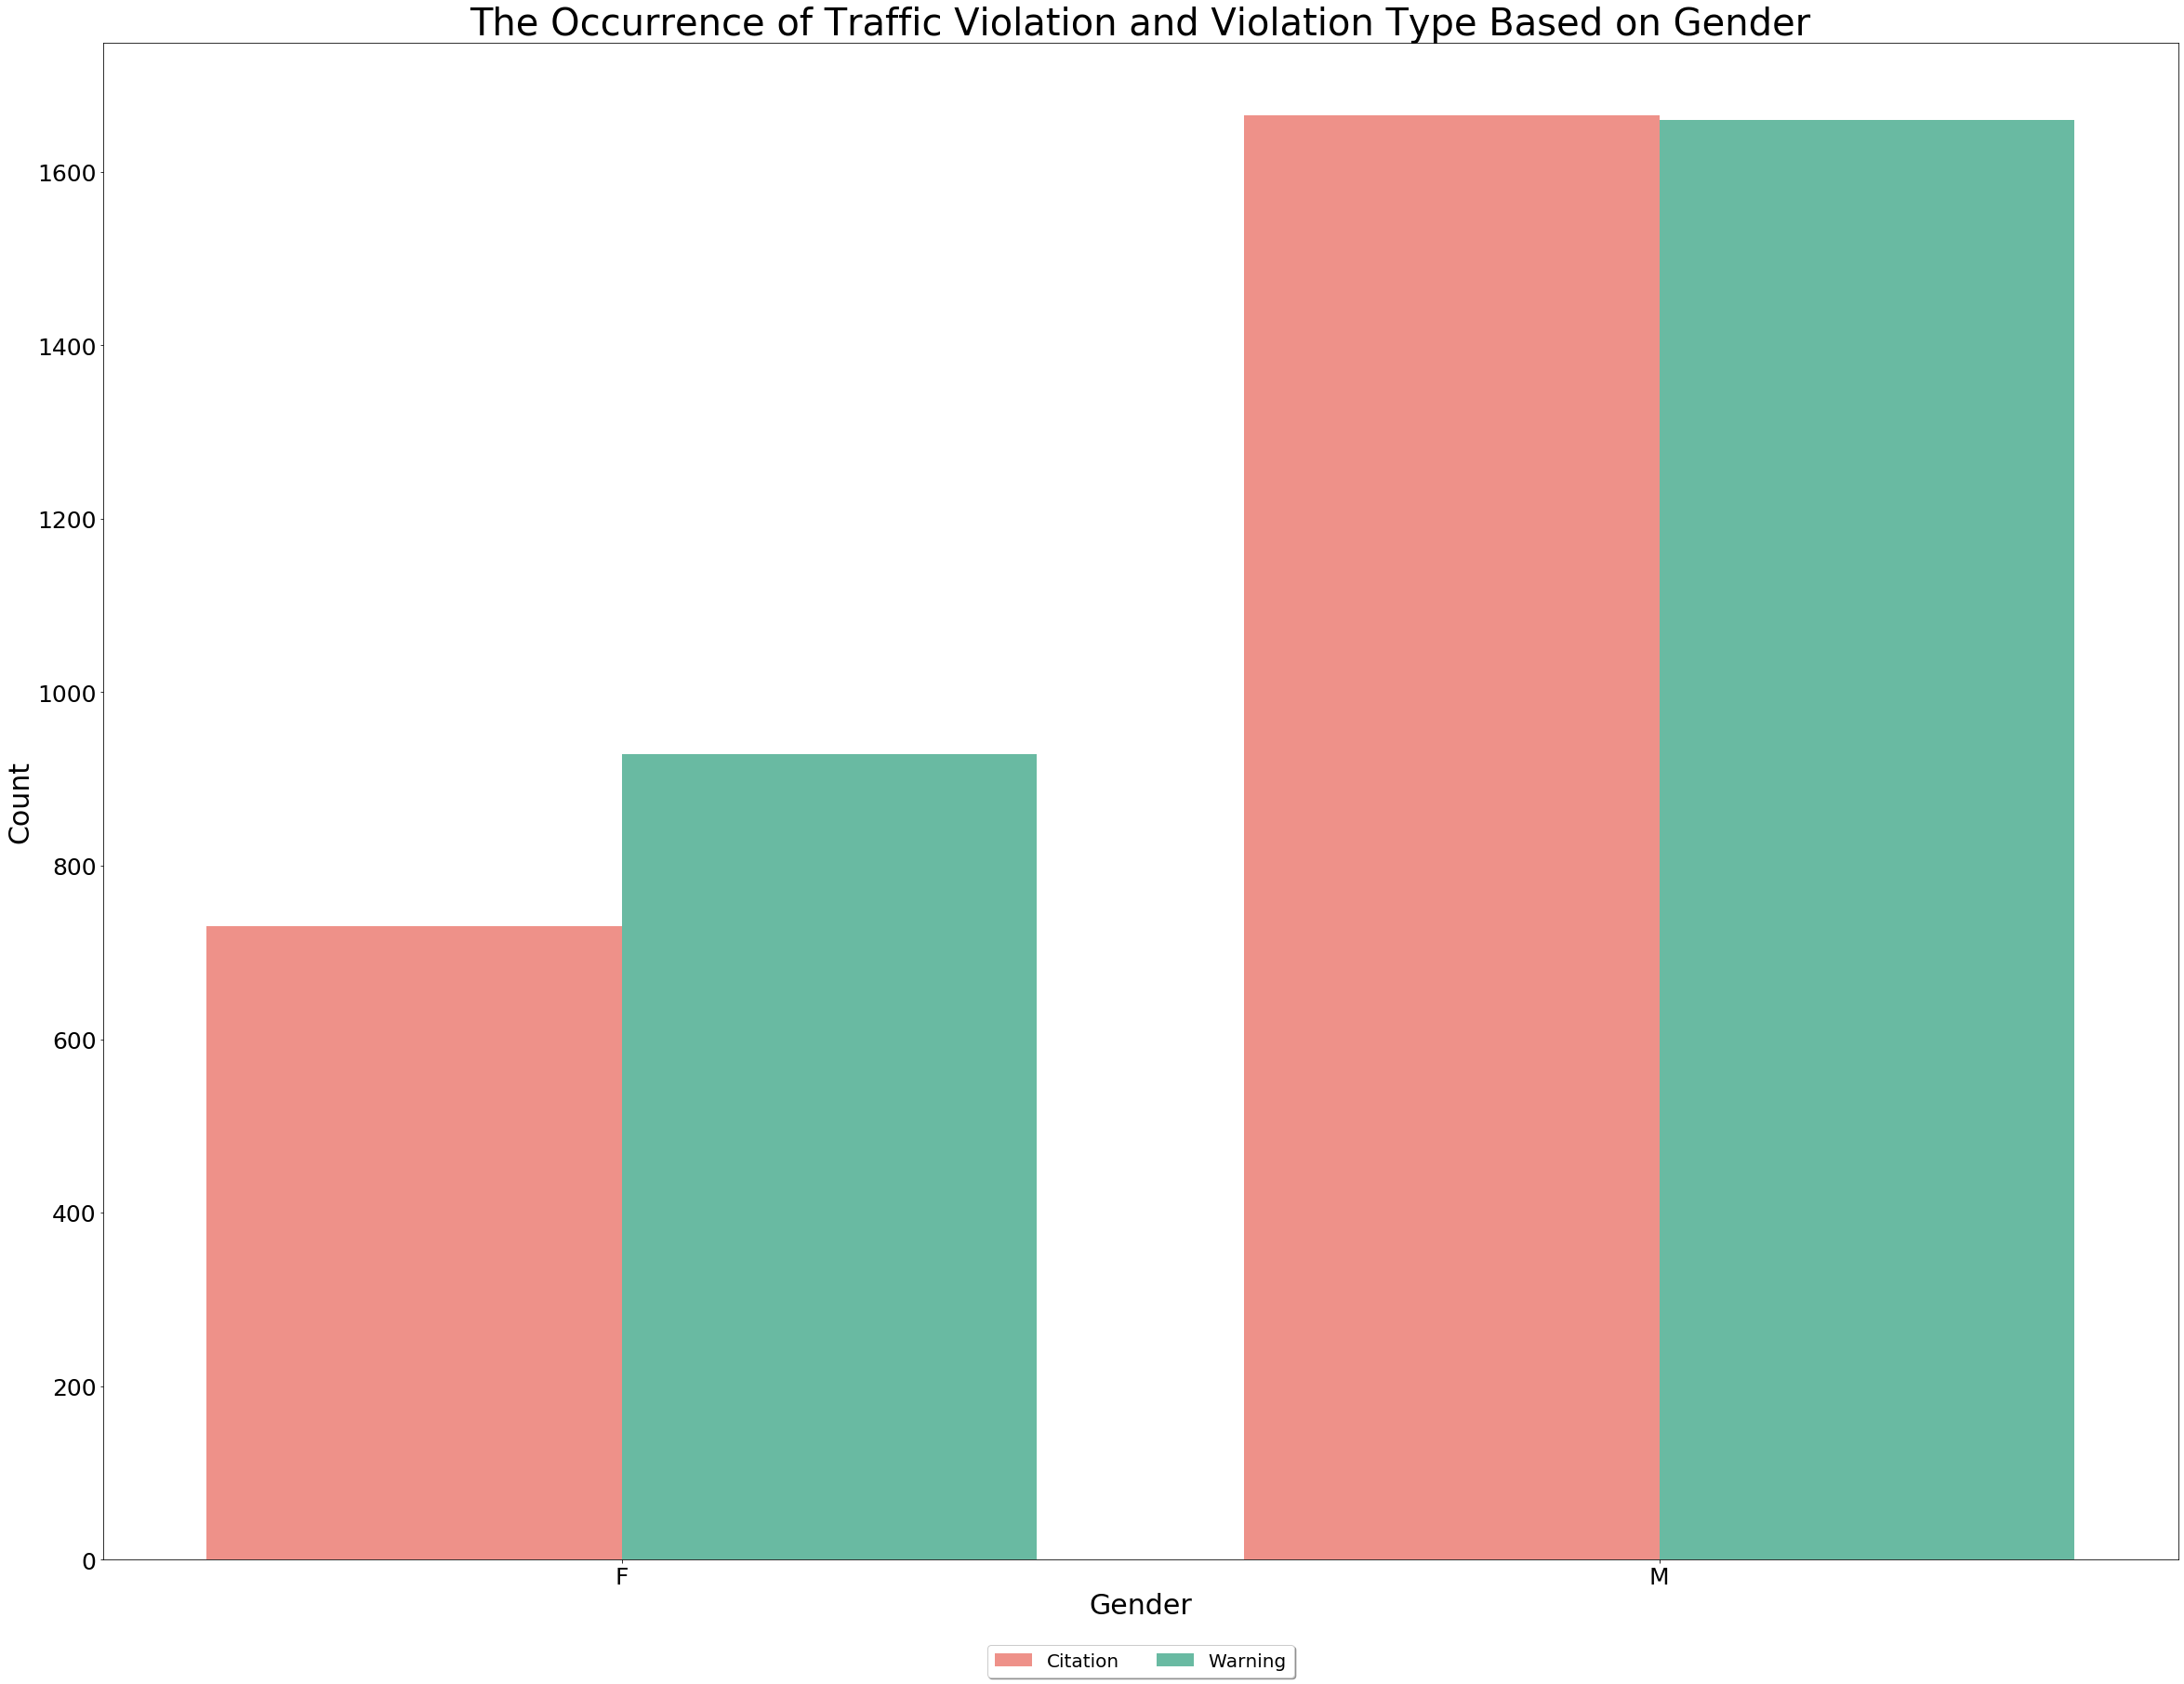

In [38]:
gv = sam.copy()
gv["count"] = 1

aggregation_functions = {'count': 'sum'}
nd = gv.groupby(['Gender', 'Violation Type']).aggregate(aggregation_functions)

# Setting up the plot and dimension
fig, axs = plt.subplots() 
fig.set_figheight(30)
fig.set_figwidth(40)

g1 = sns.barplot(x="Gender", y ="count", hue="Violation Type", palette = ["#ff8378", "#5bc7a7"], data=nd.reset_index(), ax = axs)
g1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3, labelspacing=2, fontsize = 20)

g1.set_title("The Occurrence of Traffic Violation and Violation Type Based on Gender", fontsize = 40)
g1.set_ylabel("Count", fontsize = 30)
g1.set_xlabel("Gender", fontsize = 30)
g1.tick_params(axis='both', labelsize=25)

plt.show()

Observation: Just by looking at this graph, one could claim that females are more likely to get a warning than a citation as their warning to citation ratio is a lot higher than the male's warning to citation ratio. However, this graph cannot fully support that argument as it lacks the severity of each citation depicted. The dataset we obtained makes it too difficult to infer each traffic violation and its severity.

<hr>

# 3. Applications
## 3.1 Can We Predict What Violation Type Someone Can Get?

If you get pulled over by the cops, could we predict whether you would get a citation or a warning? To predict such a result, we would have to delve in some statistics and regression models. The graphs below will illustrate a multiple linear regression model since we believe that the hour of the day and an individual's gender and race can affect what violation type the individual would get.

From our graph and observation above, we could see that there could be a relationship betweeen the hours, gender, race, and the type of Traffic Violation. Therefore our Null Hypothesis will be that there is no correlation between the hours of the day, gender, race, and the type of Traffic Violation.

<b> Null Hypothesis:</b> There is no correlation between Gender, Race, and the type of Traffic Violation. 

In order to compute our regression model, we have to convert our categorical variables, such as gender, race, and violation type, to numerical representation of them. Categorical variables are variables that take on values such names and labels. For more information on Categorical Variables, visit https://courses.lumenlearning.com/wmopen-concepts-statistics/chapter/what-is-data/.

In [39]:
data_reg = sam.copy()

vt = {"Warning": 1,
      "Citation": 2,
      "ESERO": 3,
      "SERO": 4}

data_reg["violation_type_num"] = [vt[v] for v in data_reg["Violation Type"]]
data_reg = pd.get_dummies(data_reg, columns = ["Gender"])
data_reg = pd.get_dummies(data_reg, columns = ["Race"])
data_reg["Race_NATIVE"] = data_reg["Race_NATIVE AMERICAN"] # Rename the column Race_NATIVE AMERICAN to Race_NATIVE

data_reg.head()

Date Of Stop Time Of Stop                                        SubAgency  \
0   2016-05-01     23:08:00                            4th district, Wheaton   
1   2017-11-30     01:14:00                      3rd district, Silver Spring   
2   2012-05-24     10:48:00                      3rd district, Silver Spring   
3   2012-10-18     03:30:00                      3rd district, Silver Spring   
4   2012-02-16     07:47:00  6th district, Gaithersburg / Montgomery Village   

                                         Description  \
0  DRIVER FAIL TO STOP AT RED TRAFFIC SIGNAL BEFO...   
1  DRIVING VEHICLE IN EXCESS OF REASONABLE AND PR...   
2  DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...   
3  DRIVING TO DRIVE MOTOR VEHICLE ON HIGHWAY WITH...   
4  EXCEEDING MAXIMUM SPEED: 34 MPH IN A POSTED 25...   

                             Location   Latitude  Longitude Violation Type  \
0        GEORGIA AVE AT GLENALLAN AVE  39.063522 -77.055263       Citation   
1        RANDOLPH ROAD AT TAMARACK RD  39.067270 -76.984982       Citation   
2      WAYNE AVE / COLESVILLE RD, W/B  38.995165 -77.031199       Citation   
3        COLUMBIA PIKE AT LORRAIN AVE  38.998501 -77.026377       Citation   
4  GAME PRESERVE RD N/B (11400 BLOCK)  39.157287 -77.239419       Citation   

   hour cut  violation_type_num  Gender_F  Gender_M  Race_ASIAN  Race_BLACK  \
0    23  12                   2         0         1           0           0   
1     1   1                   2         0         1           0           1   
2    10   6                   2         1         0           0           0   
3     3   2                   2         0         1           0           1   
4     7   4                   2         1         0           0           0   

   Race_HISPANIC  Race_NATIVE AMERICAN  Race_OTHER  Race_WHITE  Race_NATIVE  
0              1                     0           0           0            0  
1              0                     0           0           0            0  
2              1                     0           0           0            0  
3              0                     0           0           0            0  
4              1                     0           0           0            0

Here, we are computing a mulitple linear regression model where the formula is<br> 
Violation Type = a_0 + a_1*hour + a_2*Asian + a_3*Black + a_4*White + a_5*Hispanic + a_6*Other + a_7*Native American + a_8*Male + a_9*Female <br>
Where a_i (for i = 0 to 9) are the coefficients

In [40]:
distlr = sm.ols(formula = 'violation_type_num ~ hour + Race_ASIAN + Race_BLACK + + Race_WHITE + Race_HISPANIC + Race_OTHER + Race_NATIVE + Gender_F + Gender_M', data = data_reg).fit()   

distlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     violation_type_num   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     15.66
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           1.91e-20
Time:                        16:15:16   Log-Likelihood:                -3559.3
No. Observations:                4984   AIC:                             7135.
Df Residuals:                    4976   BIC:                             7187.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9055      0.019     48.342      0.000       0.869       0.942
hour             -0.0058      0.001     -5.846      0.000      -0.008      -0.004
Race_ASIAN        0.0812      0.035      2.291      0.022       0.012       0.151
Race_BLACK        0.2167      0.028      7.747      0.000       0.162       0.272
Race_WHITE        0.1632      0.028      5.926      0.000       0.109       0.217
Race_HISPANIC     0.2607      0.029      9.011      0.000       0.204       0.317
Race_OTHER        0.0773      0.037      2.114      0.035       0.006       0.149
Race_NATIVE       0.1064      0.140      0.758      0.448      -0.169       0.382
Gender_F          0.4277      0.013     34.122      0.000       0.403       0.452
Gender_M          0.4779      0.011     41.863      0.000       0.455       0.500
==============================================================================
Omnibus:                    18321.544   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              761.490
Skew:                           0.075   Prob(JB):                    4.41e-166
Kurtosis:                       1.091   Cond. No.                     2.40e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We are now testing our regression model to see how well it predicts what violation type each entry will get. To do this, we take a residual of the actual violation type - the predicted violation type and make a violinplot, graphing the hours with the residual. By doing so, we can see the distribution of which entry we got right and wrong.

For more information on violin plots, please refer to https://towardsdatascience.com/violin-plots-explained-fb1d115e023d

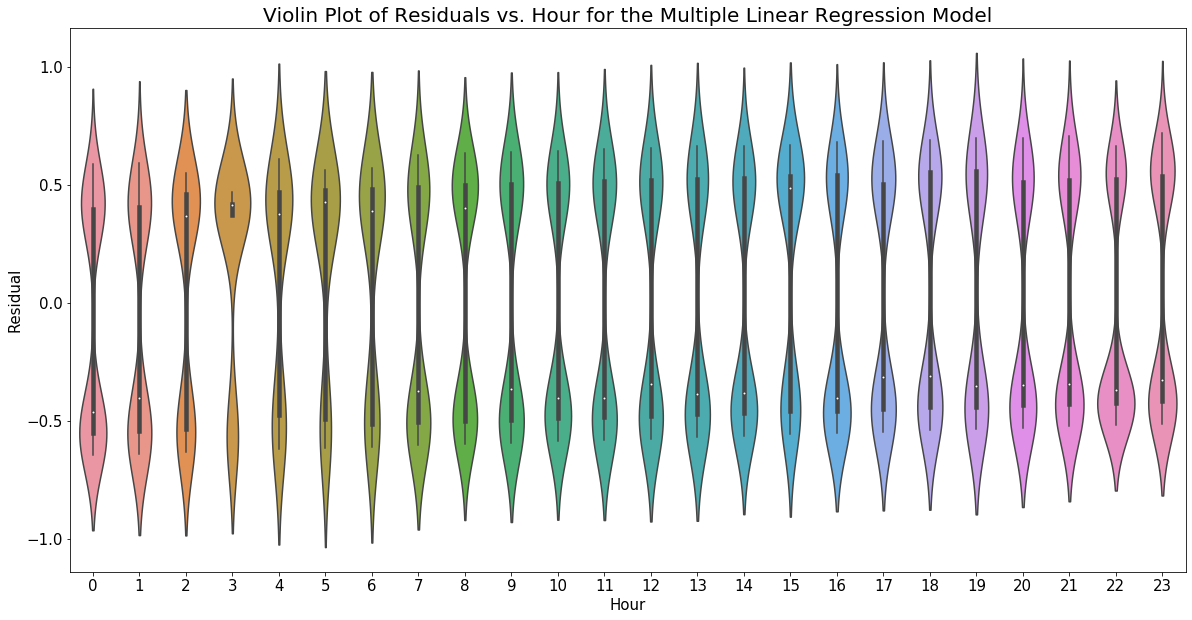

In [41]:
# Setting up the plot and dimension
fig, axs = plt.subplots(nrows = 1)
fig.set_figheight(10)
fig.set_figwidth(20)

predict = distlr.predict({"hour": data_reg["hour"],"Gender_F": data_reg['Gender_F'], 
                          "Gender_M": data_reg['Gender_M'], "Race_ASIAN": data_reg['Race_ASIAN'],
                          "Race_BLACK": data_reg['Race_BLACK'], "Race_WHITE": data_reg['Race_WHITE'],
                          "Race_HISPANIC": data_reg['Race_HISPANIC'], "Race_OTHER": data_reg['Race_OTHER'],
                          "Race_NATIVE": data_reg['Race_NATIVE']})

resid = data_reg["violation_type_num"] - predict
d1 = sns.violinplot(x = data_reg["hour"], y = resid, ax = axs)
d1.set_title("Violin Plot of Residuals vs. Hour for the Multiple Linear Regression Model", fontsize = 20)
d1.set_ylabel("Residual", fontsize = 15)
d1.set_xlabel("Hour", fontsize = 15)
d1.tick_params(axis='both', labelsize=15)

plt.show()

What we observe is that our residual are mostly around 0.5 and -0.5. This means that our model is predicting values between 1 and 2 (Technically also 3 for ESERO and 4 for SERO, but they are very rare), meaning that it can predict a decimal value such as 1.5. This doesn't make sense in our analysis because you can only get it right or wrong. In other words, our residual should only have values of 1, 0, or -1, where 0 = correct and 1,-1 = wrong. In order to make sense of the prediction, we rounded any predictions less than 1.5 to 1 and any predictions greater than or equal to 1.5 to 2.

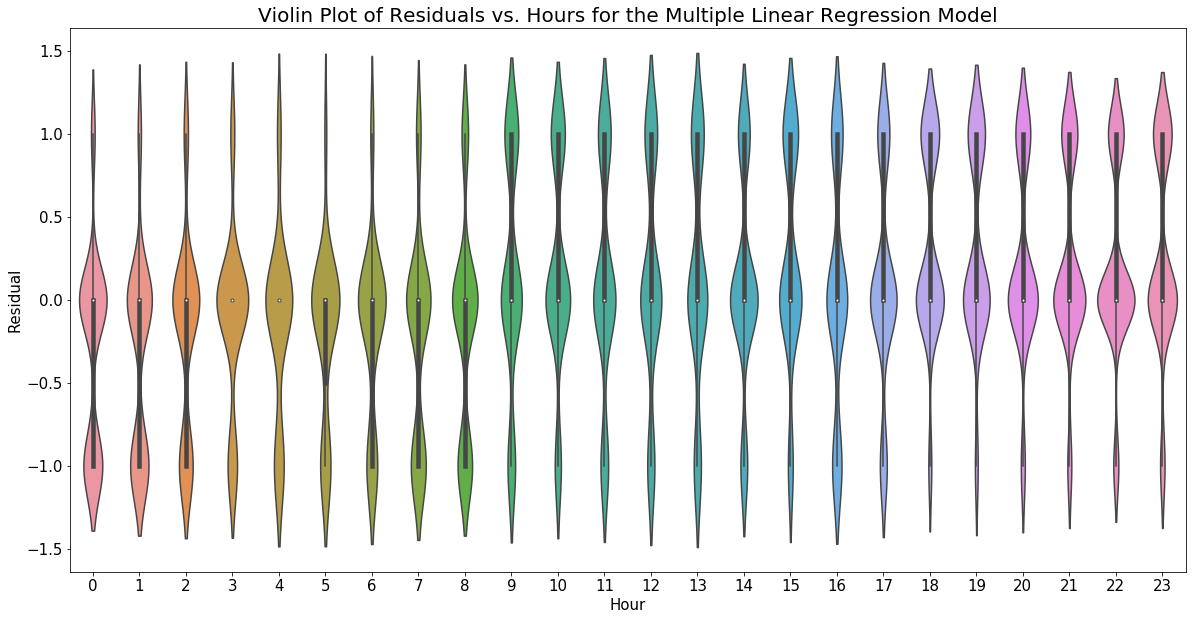

In [42]:
rounded = []
for p in predict:
    if p < 1.5:
        rounded.append(1)
    elif p < 2.5: 
        rounded.append(2)
    elif p < 3.5:
        rounded.append(3)
    else:
        rounded.append(4)
        
# Setting up the plot and dimension
fig, axs = plt.subplots(nrows = 1)
fig.set_figheight(10)
fig.set_figwidth(20)        

resid = data_reg["violation_type_num"] - rounded
d2 = sns.violinplot(x = data_reg["hour"], y = resid, ax = axs)
d2.set_title("Violin Plot of Residuals vs. Hours for the Multiple Linear Regression Model", fontsize = 20)
d2.set_ylabel("Residual", fontsize = 15)
d2.set_xlabel("Hour", fontsize = 15)
d2.tick_params(axis='both', labelsize=15)

plt.show()

In our violinplot of the residuals vs hours for the multiple linear regression model, we can see that there is a relatively dense middle peak (where the residual = 0) throughout the hours. This means that our model does a relatively decent job of predicting what the violation type will be for our data. However, since there are other peaks in our plots (bimodal) for each hours (either at residual = -1 or residual = 1), it tells that the predictive accuracy of our models is not very high.

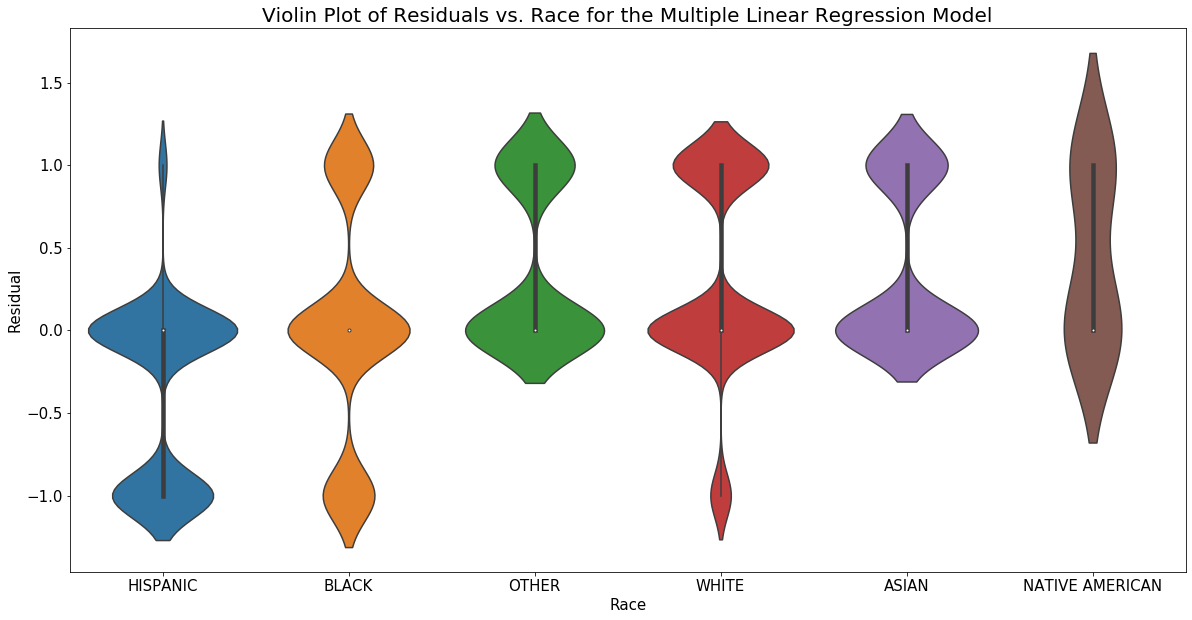

In [43]:
# Setting up the plot and dimension
fig, axs = plt.subplots(nrows = 1)
fig.set_figheight(10)
fig.set_figwidth(20)        

d2 = sns.violinplot(x = sam["Race"], y = resid, ax = axs)
d2.set_title("Violin Plot of Residuals vs. Race for the Multiple Linear Regression Model", fontsize = 20)
d2.set_ylabel("Residual", fontsize = 15)
d2.set_xlabel("Race", fontsize = 15)
d2.tick_params(axis='both', labelsize=15)

plt.show()

In our violinplot of the residuals vs race for the multiple linear regression model, we can see that there is a dense middle peak (where the residual = 0) for each race. This means that our model does a relatively decent job of predicting what the violation type will be for our data. However, since there are other peaks in our plots (bimodal or trimodal) for each race (either at residual = -1 or residual = 1), it tells that the predictive accuracy of our models is not very high.

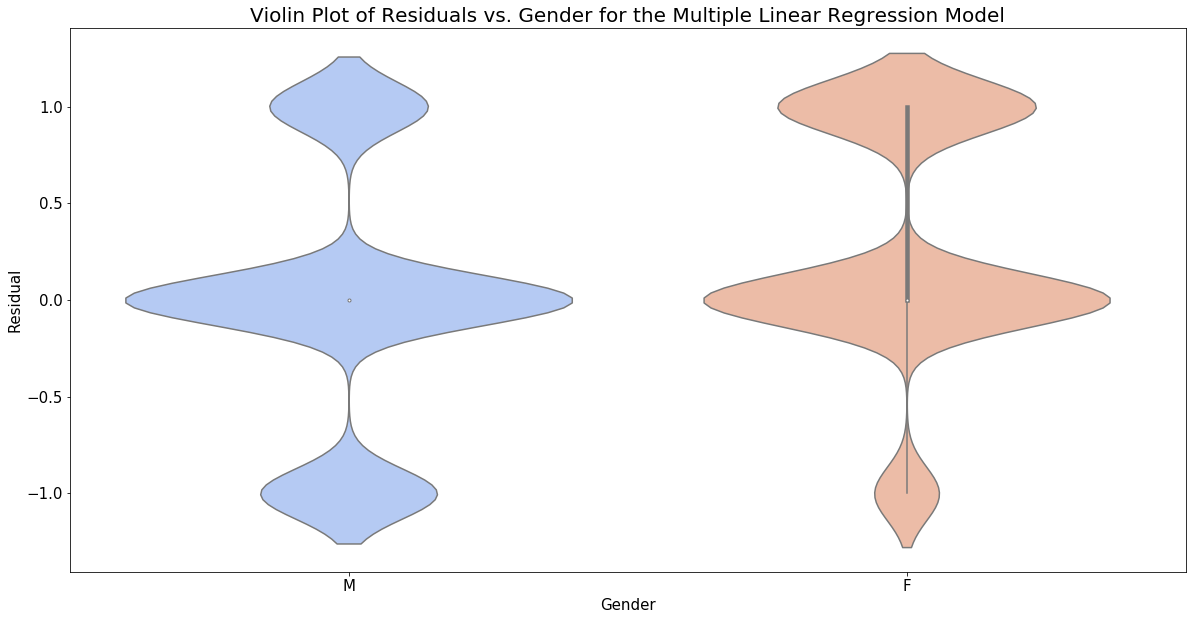

In [44]:
# Setting up the plot and dimension
fig, axs = plt.subplots(nrows = 1)
fig.set_figheight(10)
fig.set_figwidth(20)        

d2 = sns.violinplot(x = sam["Gender"], y = resid, palette = "coolwarm",ax = axs)
d2.set_title("Violin Plot of Residuals vs. Gender for the Multiple Linear Regression Model", fontsize = 20)
d2.set_ylabel("Residual", fontsize = 15)
d2.set_xlabel("Gender", fontsize = 15)
d2.tick_params(axis='both', labelsize=15)

plt.show()

In our violinplot of the residuals vs gender for the multiple linear regression model, we can see that there is a very dense middle peak (where the residual = 0) for each gender. This means that our model does a relatively good job of predicting what the violation type will be for our data. However, since there are other peaks in our plots (trimodal) that are relatively dense for each gender (either at residual = -1 or residual = 1), it tells that the predictive accuracy of our models is not high.

## 3.2 Conclusion

What are some characteristics, relationships, and factors to a traffic violation? Some potential factors to a traffic violation is gender and race. Observed in Section 2.6, 2.6, and 2.7, the bar graphs explore the relationship between race/gener and number of traffic violation, race and violation type, and gender and violation type. We can see that females are more likely to receive a warning than citation. Also, african americans and hispanics are more likely to receive a citation than a warning. This data is not fully complete and not a valid support for any basis as it lacks data on the severity of each traffic violation. As for the characteristics of traffic violations, traffic violations mainly occur in major roads such as highways, interstates, and big roads (viers mill, georgia ave, etc...) as Section 2.1 illustrates this. Section 2.3, 2.4, and 2.5 illustrates the density of traffic violations on a map with respect to time. With these illustrations, we can deduce that in major cities, there are higher traffic violation occurances than the suburban areas around it. An explanation to this phenomena is that citites have higher population density, requiring more police to be patrolling in the inner cities. Also, more population infers that there would be more traffic violations due to a numbers advantage.

![](idiots.jpg)

To avoid traffic violations, please follow these tips!

https://www.bceo.org/safedrivingtips.html

<b>Drive Safe Out There!</b>